In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

sys.path.append('../../../common_code')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


## Appendix figure showing the formation channel yields per flavor

This file uses CSV files that are produced using the code `/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/produceDataCode/write_formation_channel_rates_to_CSV_per_Z.py` <br>
This code provides simple function that opens the data file for given DCO type and BPS model, and then calculates for each metallicity the total yield for each formation channel, as well as <br>
the total yield. This uses the weights from the hdf5 file (stroopwafel weights), as well as the calculated formation channels from the DoubleCompactObjects file.  It returns the csv files <br>
with the saved calculated yields per formation channel and metallicity in the location: `/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/formation_channels_per_Z_hdf5weights_DCOname.csv` <br>
with DCOname one of: BHBH, BHNS or NSNS 




In [2]:

def plotFormationChannelsPerMetallicitySingle(axe=[], metallicities=[0.001, 0.33], formationRates=[0,0], colorlist=['k'], totalcolor='k', BPSmodelname='A',Ylim=3.85, DCOtype='BBH', plot_stacked=True, plot_fraction=False):
    """
    
    plots a single panel with formation channel yields per metallicity
    
    """
    
    # start building from 0
    upperY = np.zeros_like(formationRates[0])
    lowerY = np.zeros_like(formationRates[0])
    
    # go over rates of channels
    total = 0 
    for ind_c, c_rate in enumerate(formationRates):
        total += c_rate 
    
    total_sum = np.sum(total)
    
    
    plotfactor_higher=False
    if plot_fraction==False:
        if (DCOtype=='BNS') & (BPSmodelname in [ "E", "H"]):
            plotfactor_higher=10
        # multiply the rate by a factor 10 (or chosen factor) to make the yields visible in the large figure
        elif (DCOtype=='BHNS') & (BPSmodelname in [ "E", "G"]):
            plotfactor_higher=10        
    
    
    for ind_c, c_rate in enumerate(formationRates):
        
        
        if plot_fraction==True:
            fc_plot_rate = c_rate/total # take the fraction
#                 print('between 0 1 ', c_rate)
        else:
            fc_plot_rate = c_rate*1e5
        
        # add this rate, 
        if plotfactor_higher==False:
            upperY += c_rate/total
        else:
            upperY+= c_rate*plotfactor_higher
            
        
        
        percentage = (np.sum(c_rate) / total_sum)*100.
        percentage_str =  r'$%s$'%str((roundAndFormat1(percentage))) + str(r'\%')
        
        
        if plot_stacked==True:
        # 1e5 to make the numbers nice 
            axe.fill_between(metallicities, lowerY, upperY, facecolor=colorlist[ind_c], \
                      lw=3, alpha=1, label=percentage_str)
        else:
            

            
            if plotfactor_higher==False:
                axe.plot(metallicities, fc_plot_rate, color=colorlist[ind_c], \
                          lw=3, alpha=1, label=percentage_str)  
            else:
                axe.plot(metallicities, fc_plot_rate*plotfactor_higher, color=colorlist[ind_c], \
                          lw=3, alpha=1, label=percentage_str)              
        
        if plotfactor_higher==False:
            lowerY += fc_plot_rate
        else:
            lowerY += fc_plot_rate*plotfactor_higher    
            
    
    
    ### second axes ###
    if plot_fraction==True:
        ax2y = axe.twinx()
        ylabel2 =  r'$\eta \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'   
        ax2y.set_ylim(bottom=0)
        cdfcolor='k'
        ax2y.plot(metallicities, total*1E5, color=cdfcolor, lw=3, alpha=1, linestyle=':')

        ax2y.tick_params(labelsize=fs-4, colors=cdfcolor)
        ax2y.set_ylabel(ylabel2, fontsize=fs, color=cdfcolor) 
        
#         print('total =', total)
    
    
    ######## AXES LABELS, LEGENDS, LIMS,  ###########
    # plot extra vertical line to indicate metallicities   
    for zz_ind, zz in enumerate(metallicity_vlines_values_list) :
        axe.plot([zz,zz], [0,Ylim+1], \
                         c='k',\
                         lw=1.2, alpha=1, linestyle=':', zorder=100)   
        axe.text(zz-0.06, Ylim-0.022, s=metallicity_vlines_text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='top')   

    
    # location of the small legends is on the left, unless it does not fit:
    if DCOtype=='BBH':
        x_box, y_box = 0.63, .4
    elif (DCOtype=='BNS') and (BPSmodelname=='G'):
        x_box, y_box = 0.63, .4
    else:
        x_box, y_box = 0.01, .47
    
    if plot_fraction==False:
        axe.legend(fontsize=14,  ncol=2, \
                   bbox_to_anchor=(x_box, y_box),loc="lower left", borderaxespad=0., frameon=False).set_zorder(10000)
   
    axe.set_xlim(min(metallicities), max(metallicities))
    axe.set_ylim(0,Ylim)
        
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
    axe.annotate(r'\textbf{model %s:}'%(BPSmodelname) +'\n' + alphabetPhysicalNameDict[BPSmodelname], xy=(0.022, .95),\
                 xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props,\
                zorder=1E10)

    if plotfactor_higher!=False:
        axe.annotate(r'\textbf{%s}'%(plotfactor_higher) +r'$\times$',  xy=(0.88, .15),\
                     xycoords='axes fraction', fontsize = fs+5, weight = 'bold', ha='left', va="top", zorder=1E10)        

    
    return axe
    
    

In [3]:
# print(np.asarray(metallicities_list))
# metallicity_list = np.concatenate((np.åasarray(metallicities_list),np.asarray([0.03])))
# alphas_list = np.linspace(0.3,1, 6)

# for n_rough_Z_bins in range(6):
#     lowerZ, upperZ = 0 + 9*n_rough_Z_bins, 8 + 9*n_rough_Z_bins

#     print(metallicity_list[lowerZ], metallicity_list[upperZ])

In [4]:

def plotGridFormationRatePerMetallicity(DCOtype = 'BBH', Ylim = 10, csvPath='None', plot_stacked=True, pathToData='/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/', plot_fraction=False):

    channel_names = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']
    colorlist = [channelColorDict[i] for i in channel_names]
    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}
    print('doing DCO type  ', DCOtype)
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]  
    DCOname = dictDCOtypeDCOlabel[DCOtype]
    log10metallicities= np.log10(np.asarray(metallicities_list))


    ncols, nrows = 3, 7
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(22,26), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)}) 

    stringgg =  'formation_channels_per_Z_hdf5weights'
    writePath = pathToData  + stringgg + '_'  + DCOname + '.csv'
    
    for ind_m, bps_model in enumerate(BPSnameslist[:]):

        # hack to obtain the axis row and column index 
        ii, jj  = int(ind_m/ncols)%nrows, ind_m%ncols
         
        formationRates = []
        # obtain dataframe with formation channels yields
        df = pd.read_csv(writePath, index_col=0)
        
        for nrC, c_ in enumerate(channel_names):             # get rate of this channel: 
            key_ = bps_model + ' ' + headerDict_Z_rev[c_]+ '  [Msun^{-1}]' #bps_model + ' ' + c_ + '  [Msun^{-1}]'
            formationRates.append(df[key_])


        # plot for this sub panel & sub model the formation rate per metallicity 
        axe[ii,jj] = plotFormationChannelsPerMetallicitySingle(axe=axe[ii,jj], metallicities=log10metallicities, formationRates=formationRates, \
                                                               colorlist=colorlist, BPSmodelname=bps_model, Ylim=Ylim, DCOtype=DCOtype, plot_stacked=plot_stacked, plot_fraction=plot_fraction)

    
    ######### SET LABELS AND AXIS TICKS #########
    fs_label = 20  # fontsize for x and y labels 
    ylabel = r'$\eta \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'   
    xlabel = r'$\log_{10}(Z_{\rm{i}})$'
    if plot_fraction == True: ylabel = r'$\textbf{fraction}  $'   # overwrite ylabel
        
    
    #### set labels for all needed panels in column 1 ####
    for ii in range(nrows-1):   # set only ylabels for left most panels (first column)
        axe[ii,0] = layoutAxesNoXlabel(axe[ii,0], nameX=None, nameY=ylabel, fontsize=fs_label)
    # bottom left panel needs both axes labels
    axe[nrows-1,0] = layoutAxes(axe[nrows-1,0], nameX=xlabel, nameY=ylabel, fontsize=fs_label)

    ## set labels for all needed panels in column 2  ####
    for ii in range(nrows-1):   # set only ylabels for left most panels (first column)
        axe[ii,1] = layoutAxesNoXandYlabel(axe[ii,1], nameX=None, nameY=None, fontsize=fs_label)
    axe[nrows-1,1] = layoutAxesNoYlabel(axe[nrows-1,1], nameX=xlabel, nameY='xx', fontsize=fs_label)
        
    ## set labels for all needed panels in column 3  ####
    for ii in range(nrows-2):   # set only ylabels for left most panels (first column)
        axe[ii,2] = layoutAxesNoXandYlabel(axe[ii,2], nameX=None, nameY=None, fontsize=fs_label)

    axe[nrows-2,2] = layoutAxesNoYlabel(axe[nrows-2,2], nameX=xlabel, nameY=None, fontsize=fs_label) 
    axe[nrows-1,2].axis('off') # do not show the axes for the last empty panel 
    axe[nrows-2,2].set_zorder(100) # this makes the panel of model R go up in zorder, needed to show "-4" axes tick above other panels
    
    # do not show the axes tick labels for subplots that are not at the edge
    for ii in range(nrows-2):
        axe[ii,2].tick_params(labelbottom=False, labelleft=False)
    for ii in range(nrows-1):
        axe[ii,1].tick_params(labelbottom=False, labelleft=False)
    for ii in range(nrows-1):
        axe[ii,0].tick_params(labelbottom=False)  
    # extra to remove left tick labels only for the bottom plots 
    axe[nrows-1,1].tick_params(labelleft=False) 
    axe[nrows-2,2].tick_params(labelleft=False) 
    ################################################
    
    
    plt.tight_layout() 
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    if plot_stacked==True:
        stack_str = 'stacked'
    else:
        stack_str = 'notstacked'
    if plot_fraction==True: fract_str = '_yield'
    else: fract_str = '_fraction'
        
    plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + '.png', dpi=600, transparent=True)
    plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + '.pdf')
    plt.show()
    plt.close()
    

doing DCO type   BBH


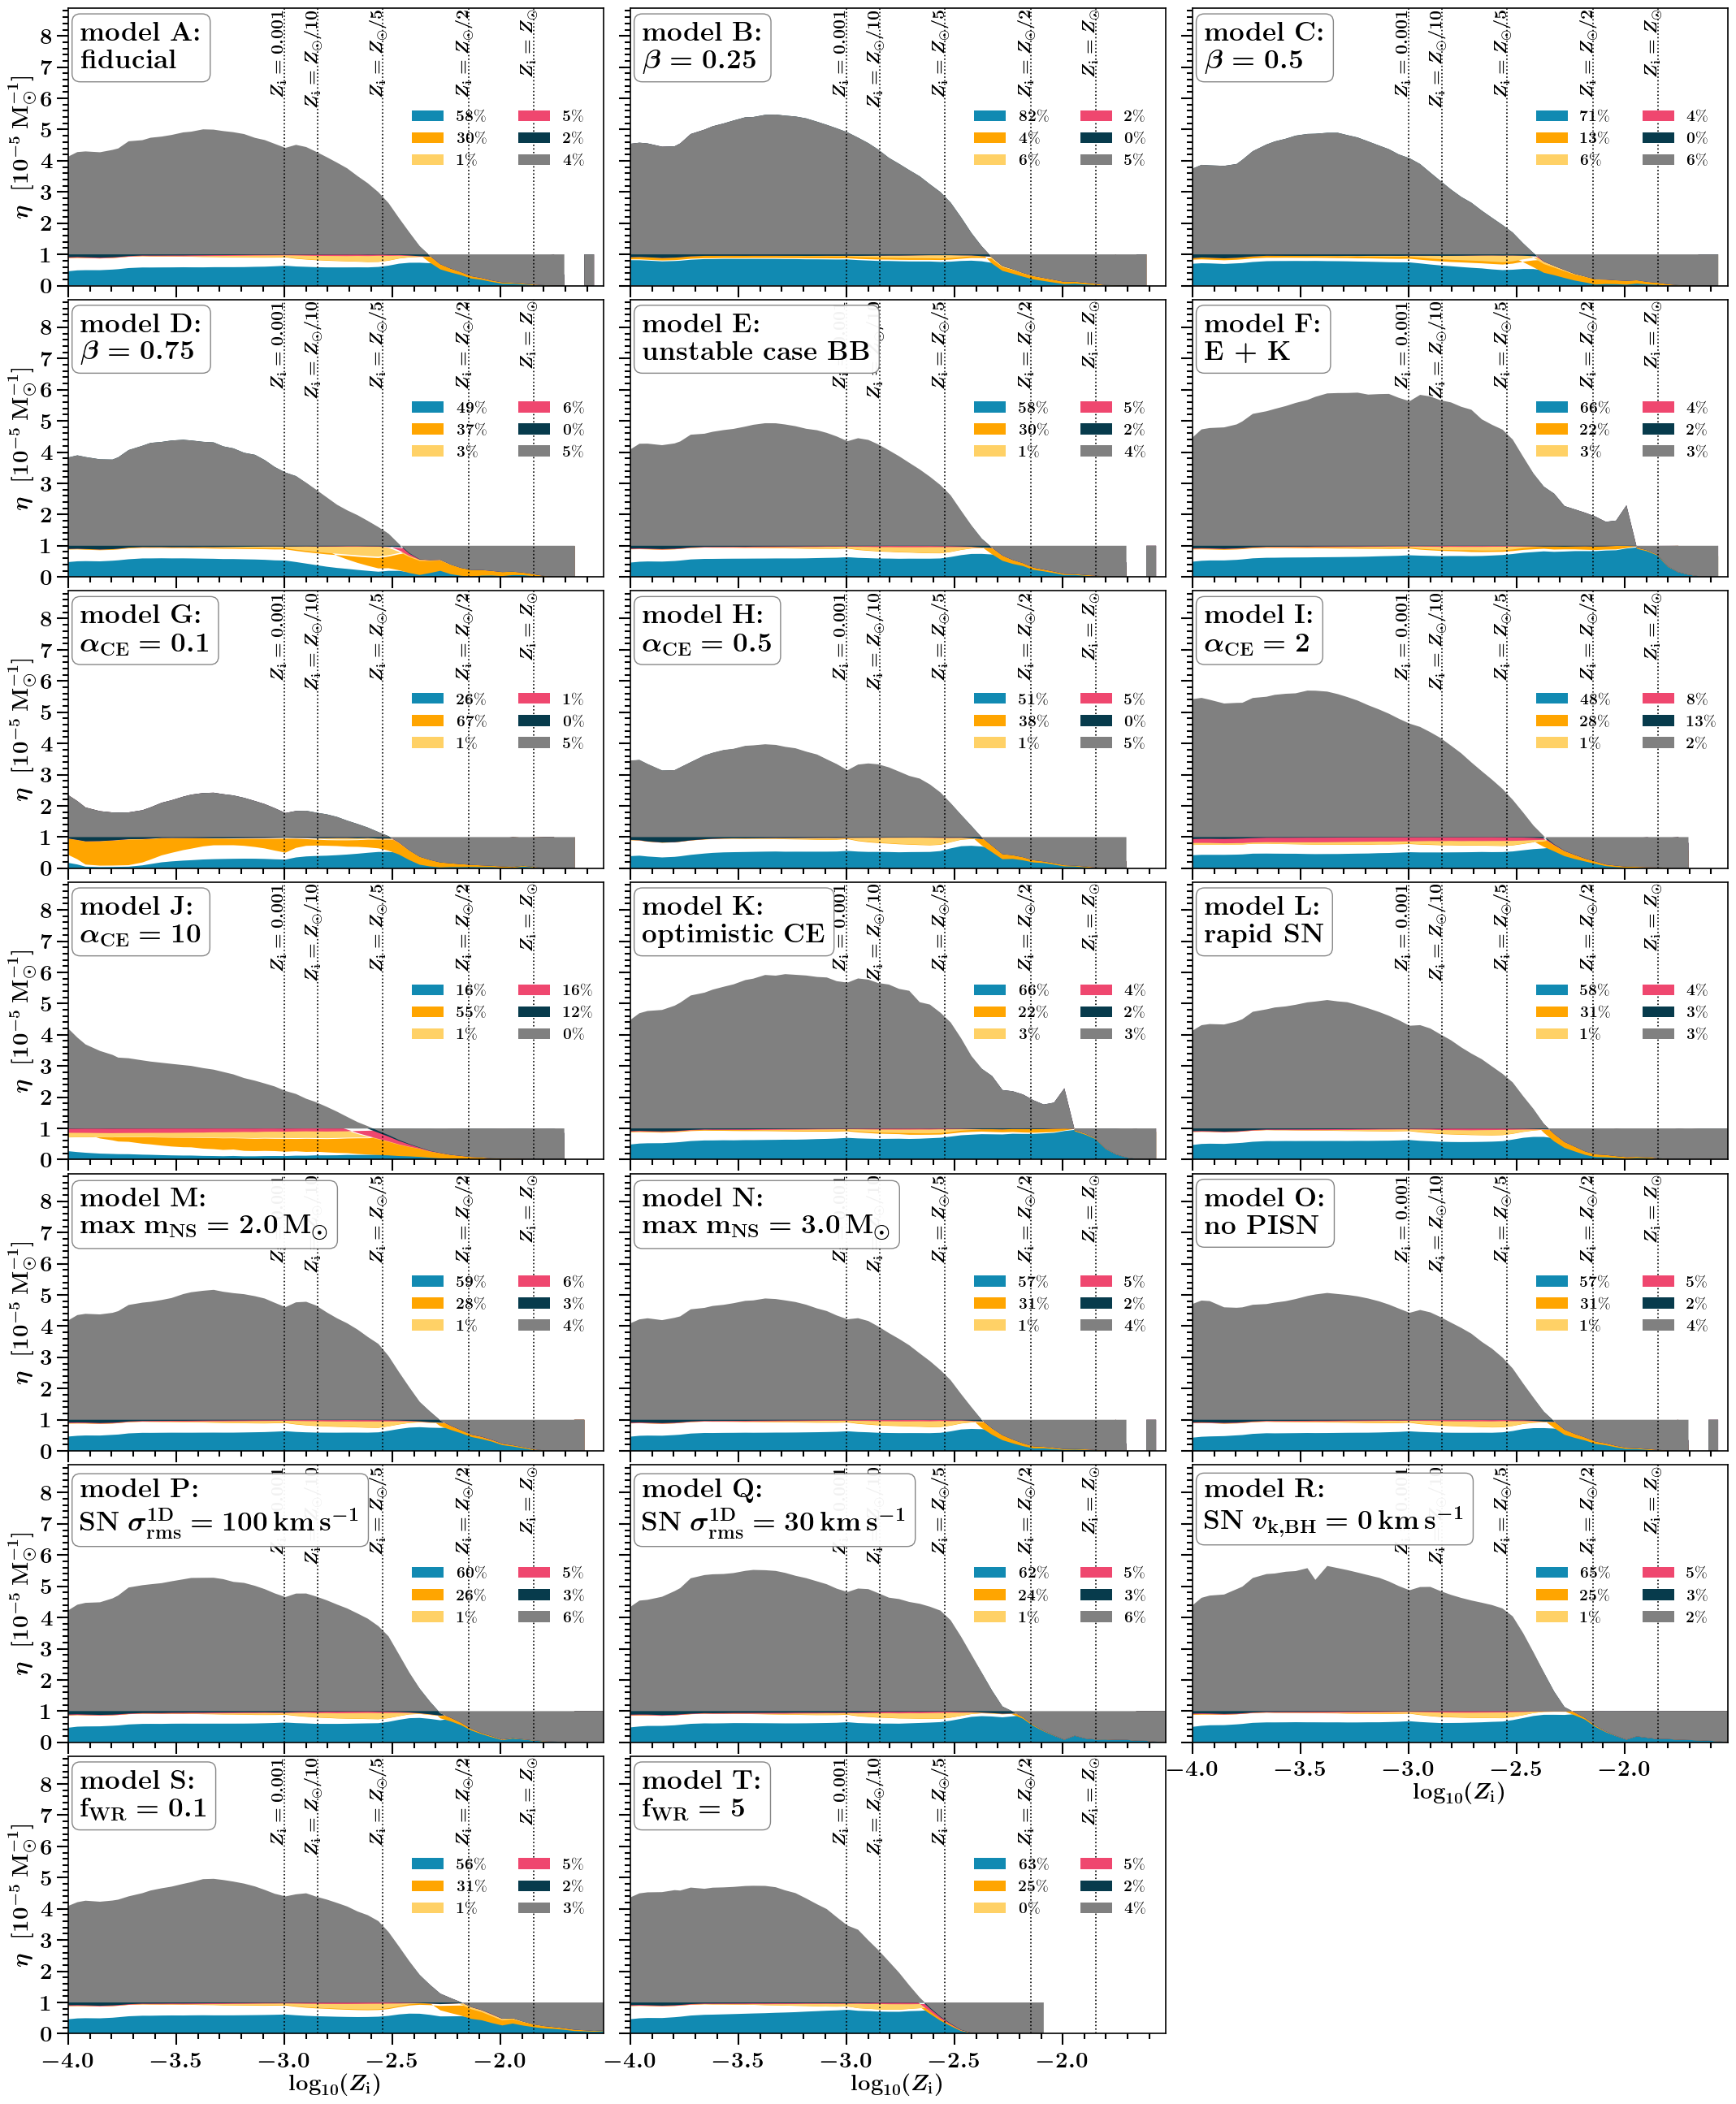

In [5]:
csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/'    
plotGridFormationRatePerMetallicity(DCOtype = 'BBH', Ylim = 8.89, csvPath=csvPath, plot_stacked=True)



doing DCO type   BHNS


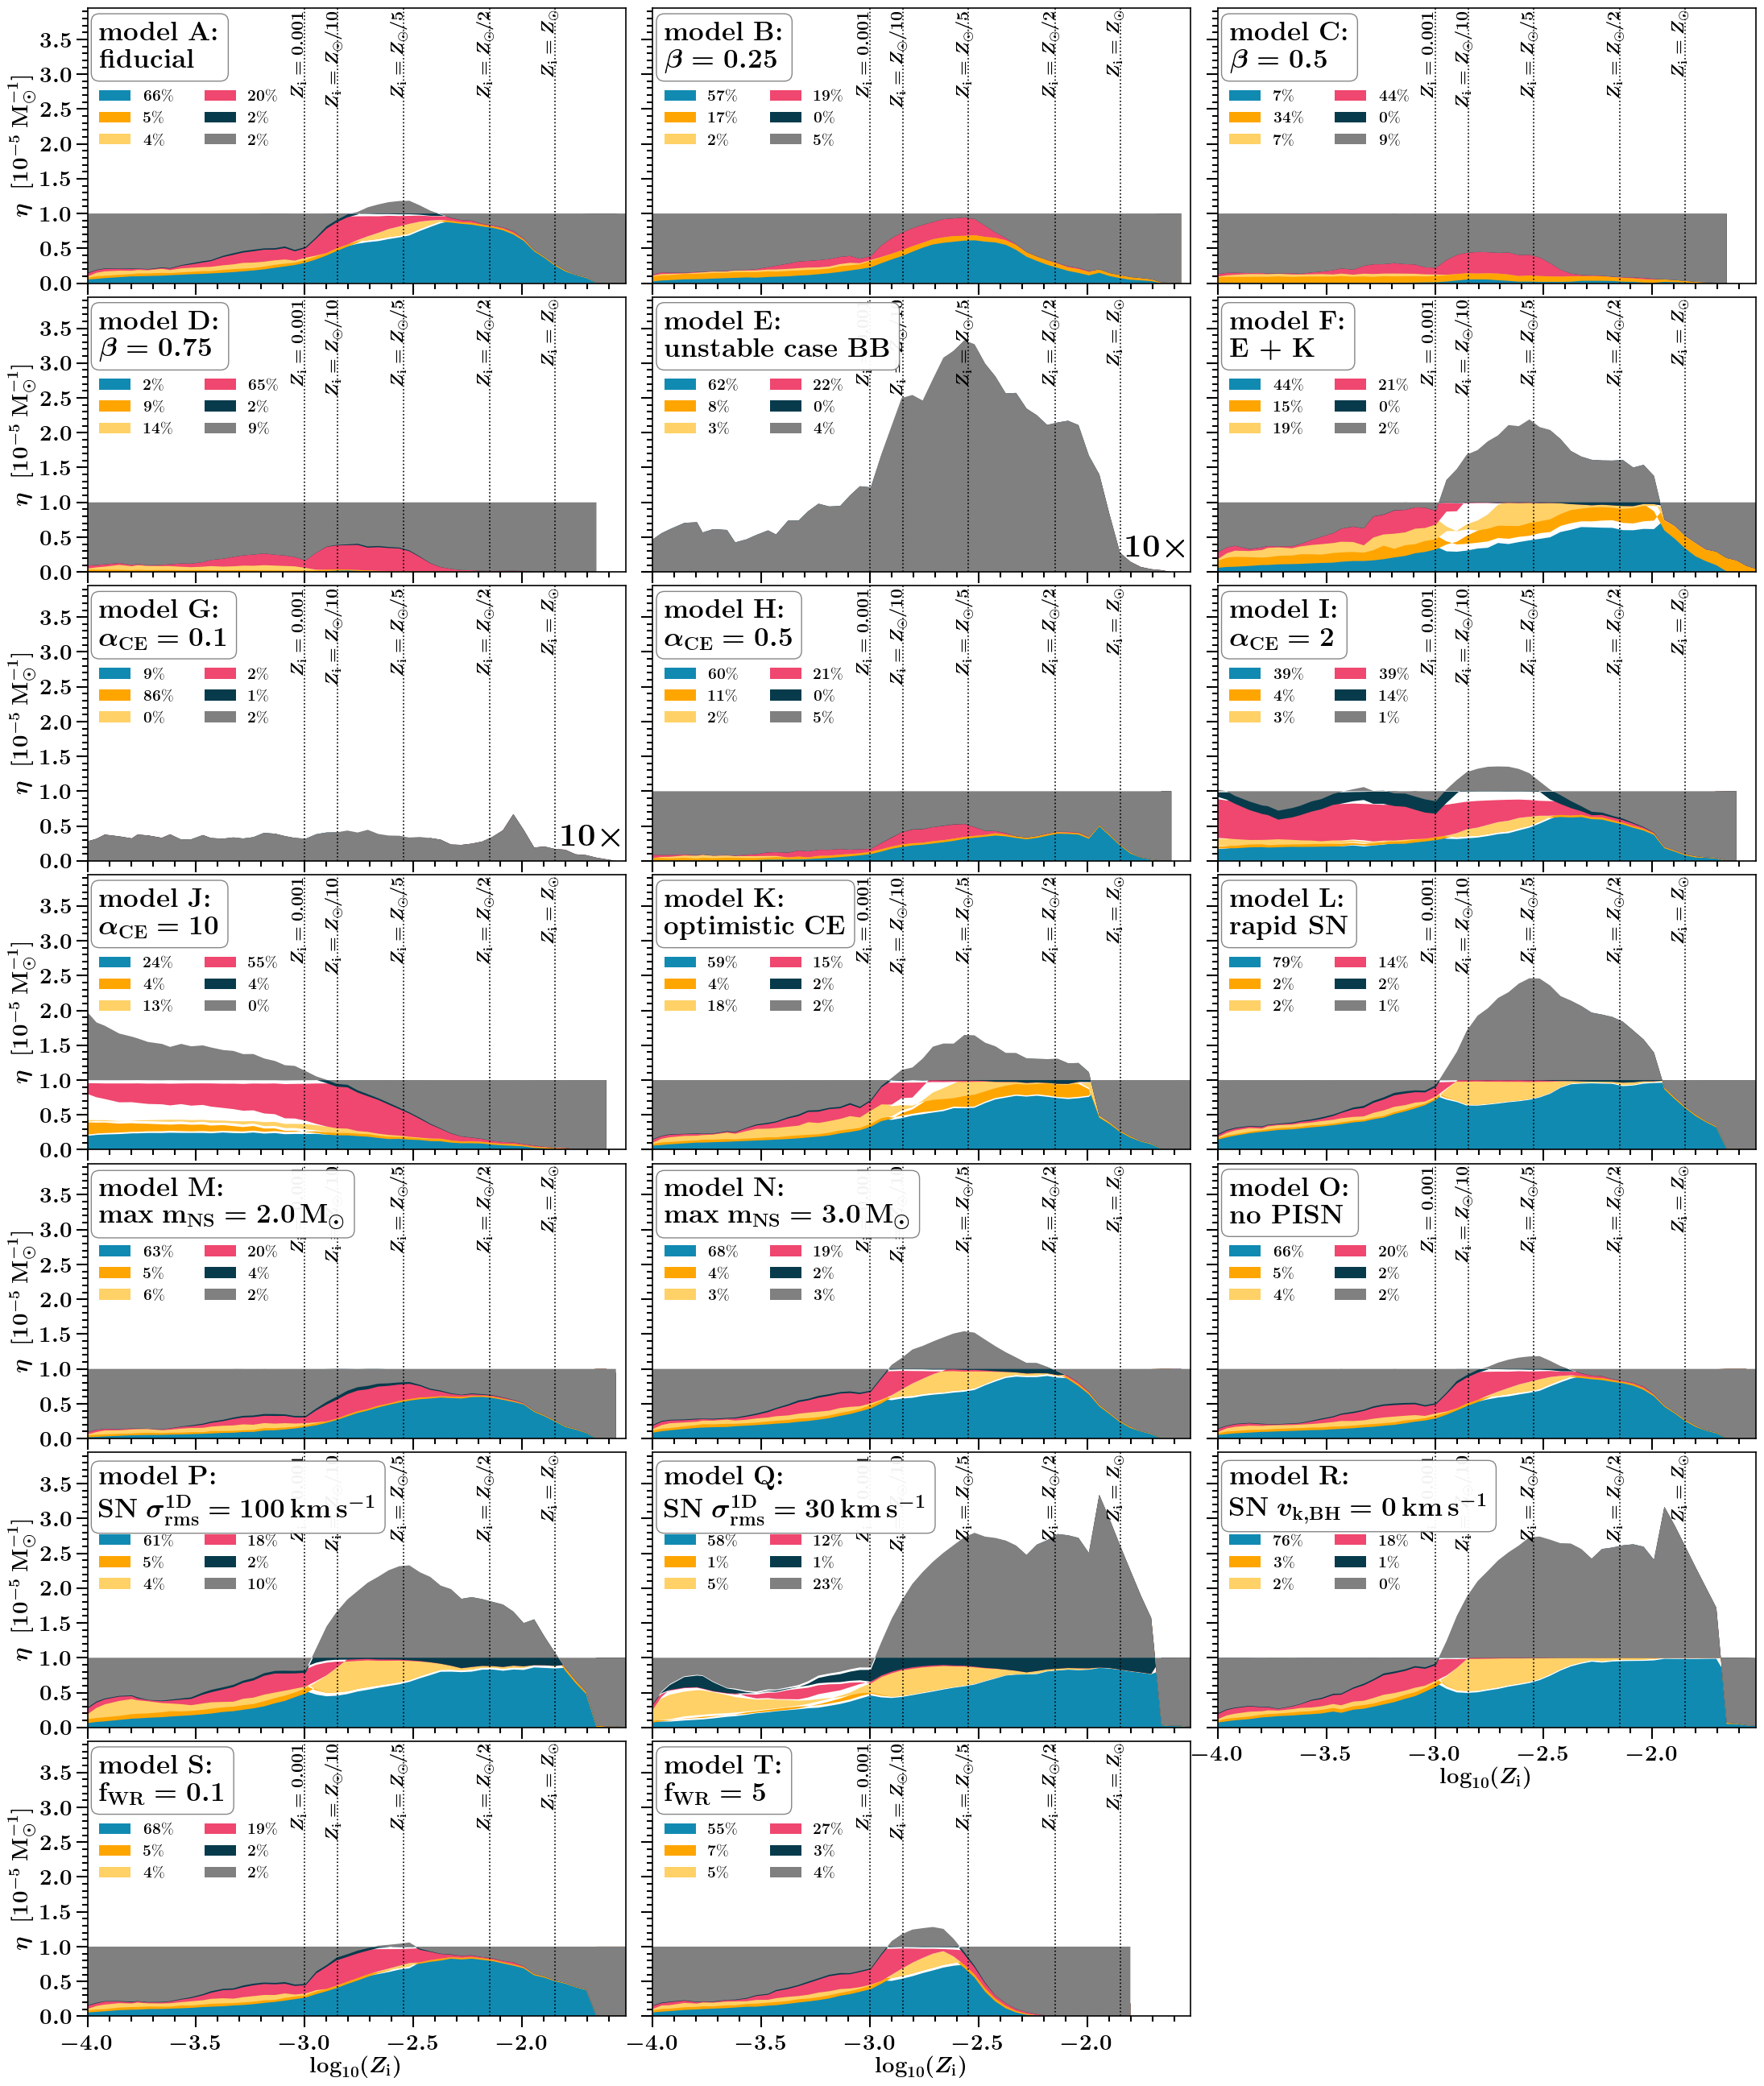

In [6]:
csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/' 
plotGridFormationRatePerMetallicity(DCOtype = 'BHNS',Ylim = 3.95, csvPath=csvPath, plot_stacked=True)



doing DCO type   BNS


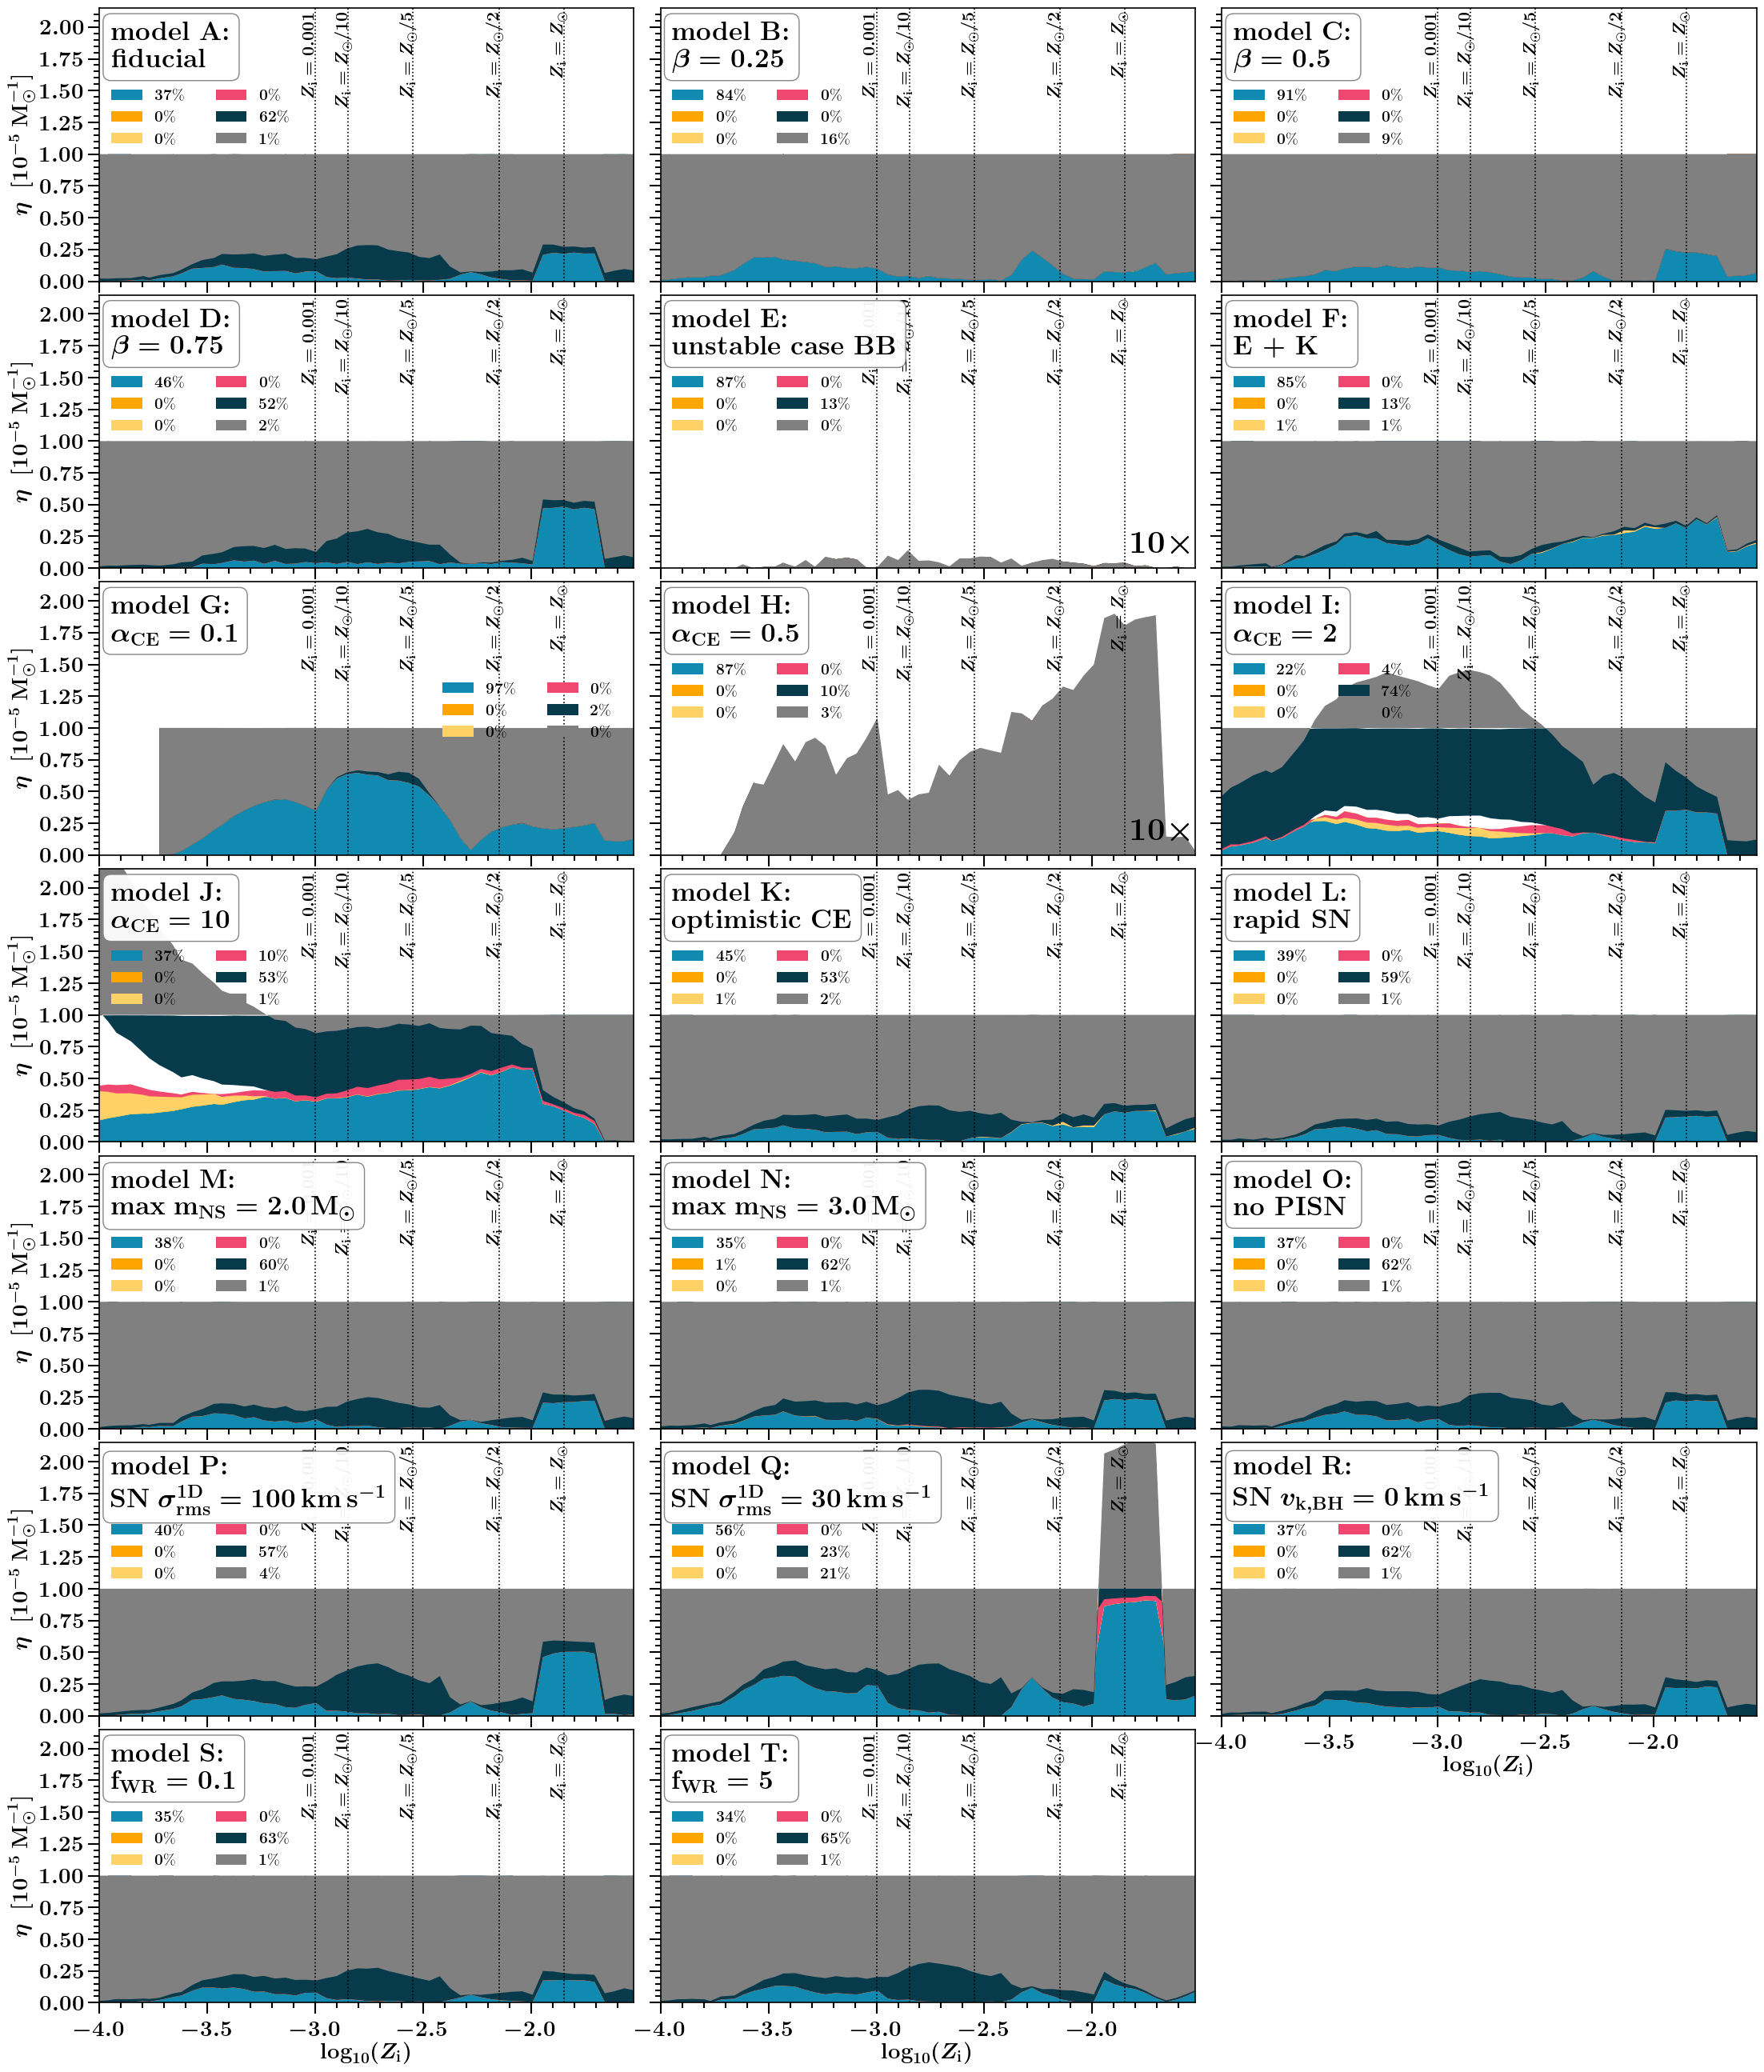

In [7]:
csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/' 
plotGridFormationRatePerMetallicity(DCOtype = 'BNS',Ylim = 2.15, csvPath=csvPath)



doing DCO type   BBH


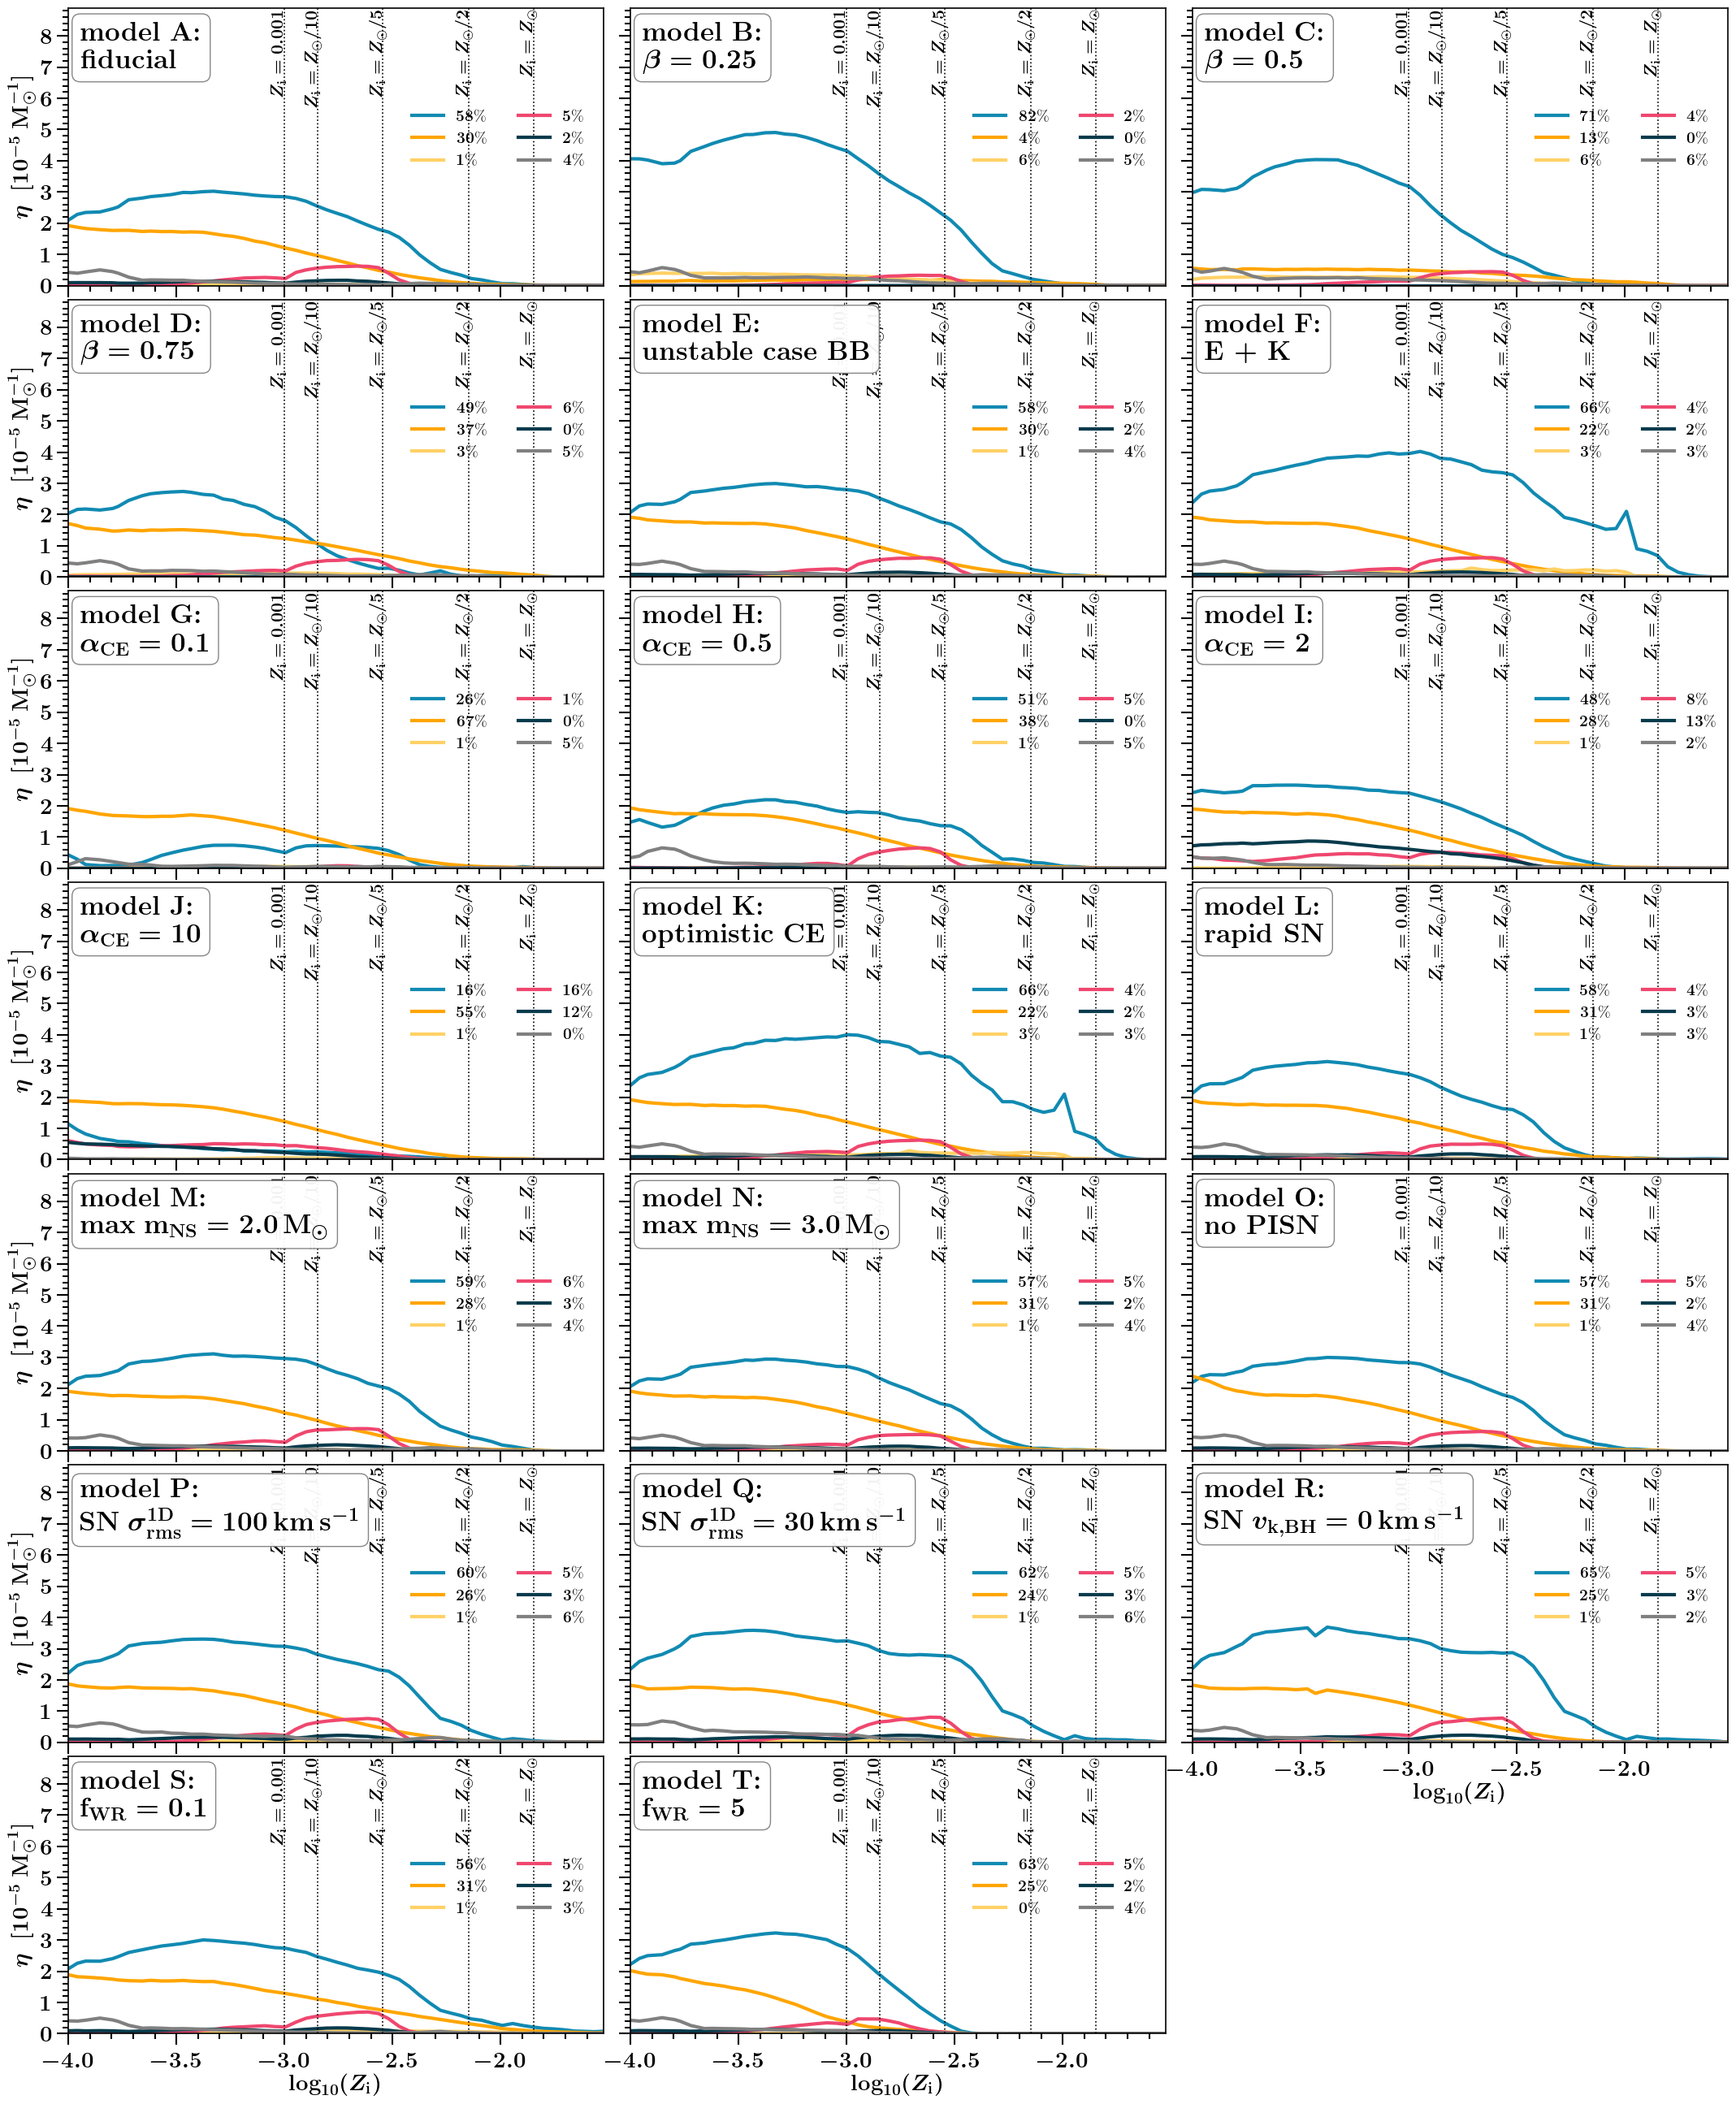

In [8]:
csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/'    
plotGridFormationRatePerMetallicity(DCOtype = 'BBH', Ylim = 8.89, csvPath=csvPath, plot_stacked=False)



doing DCO type   BHNS


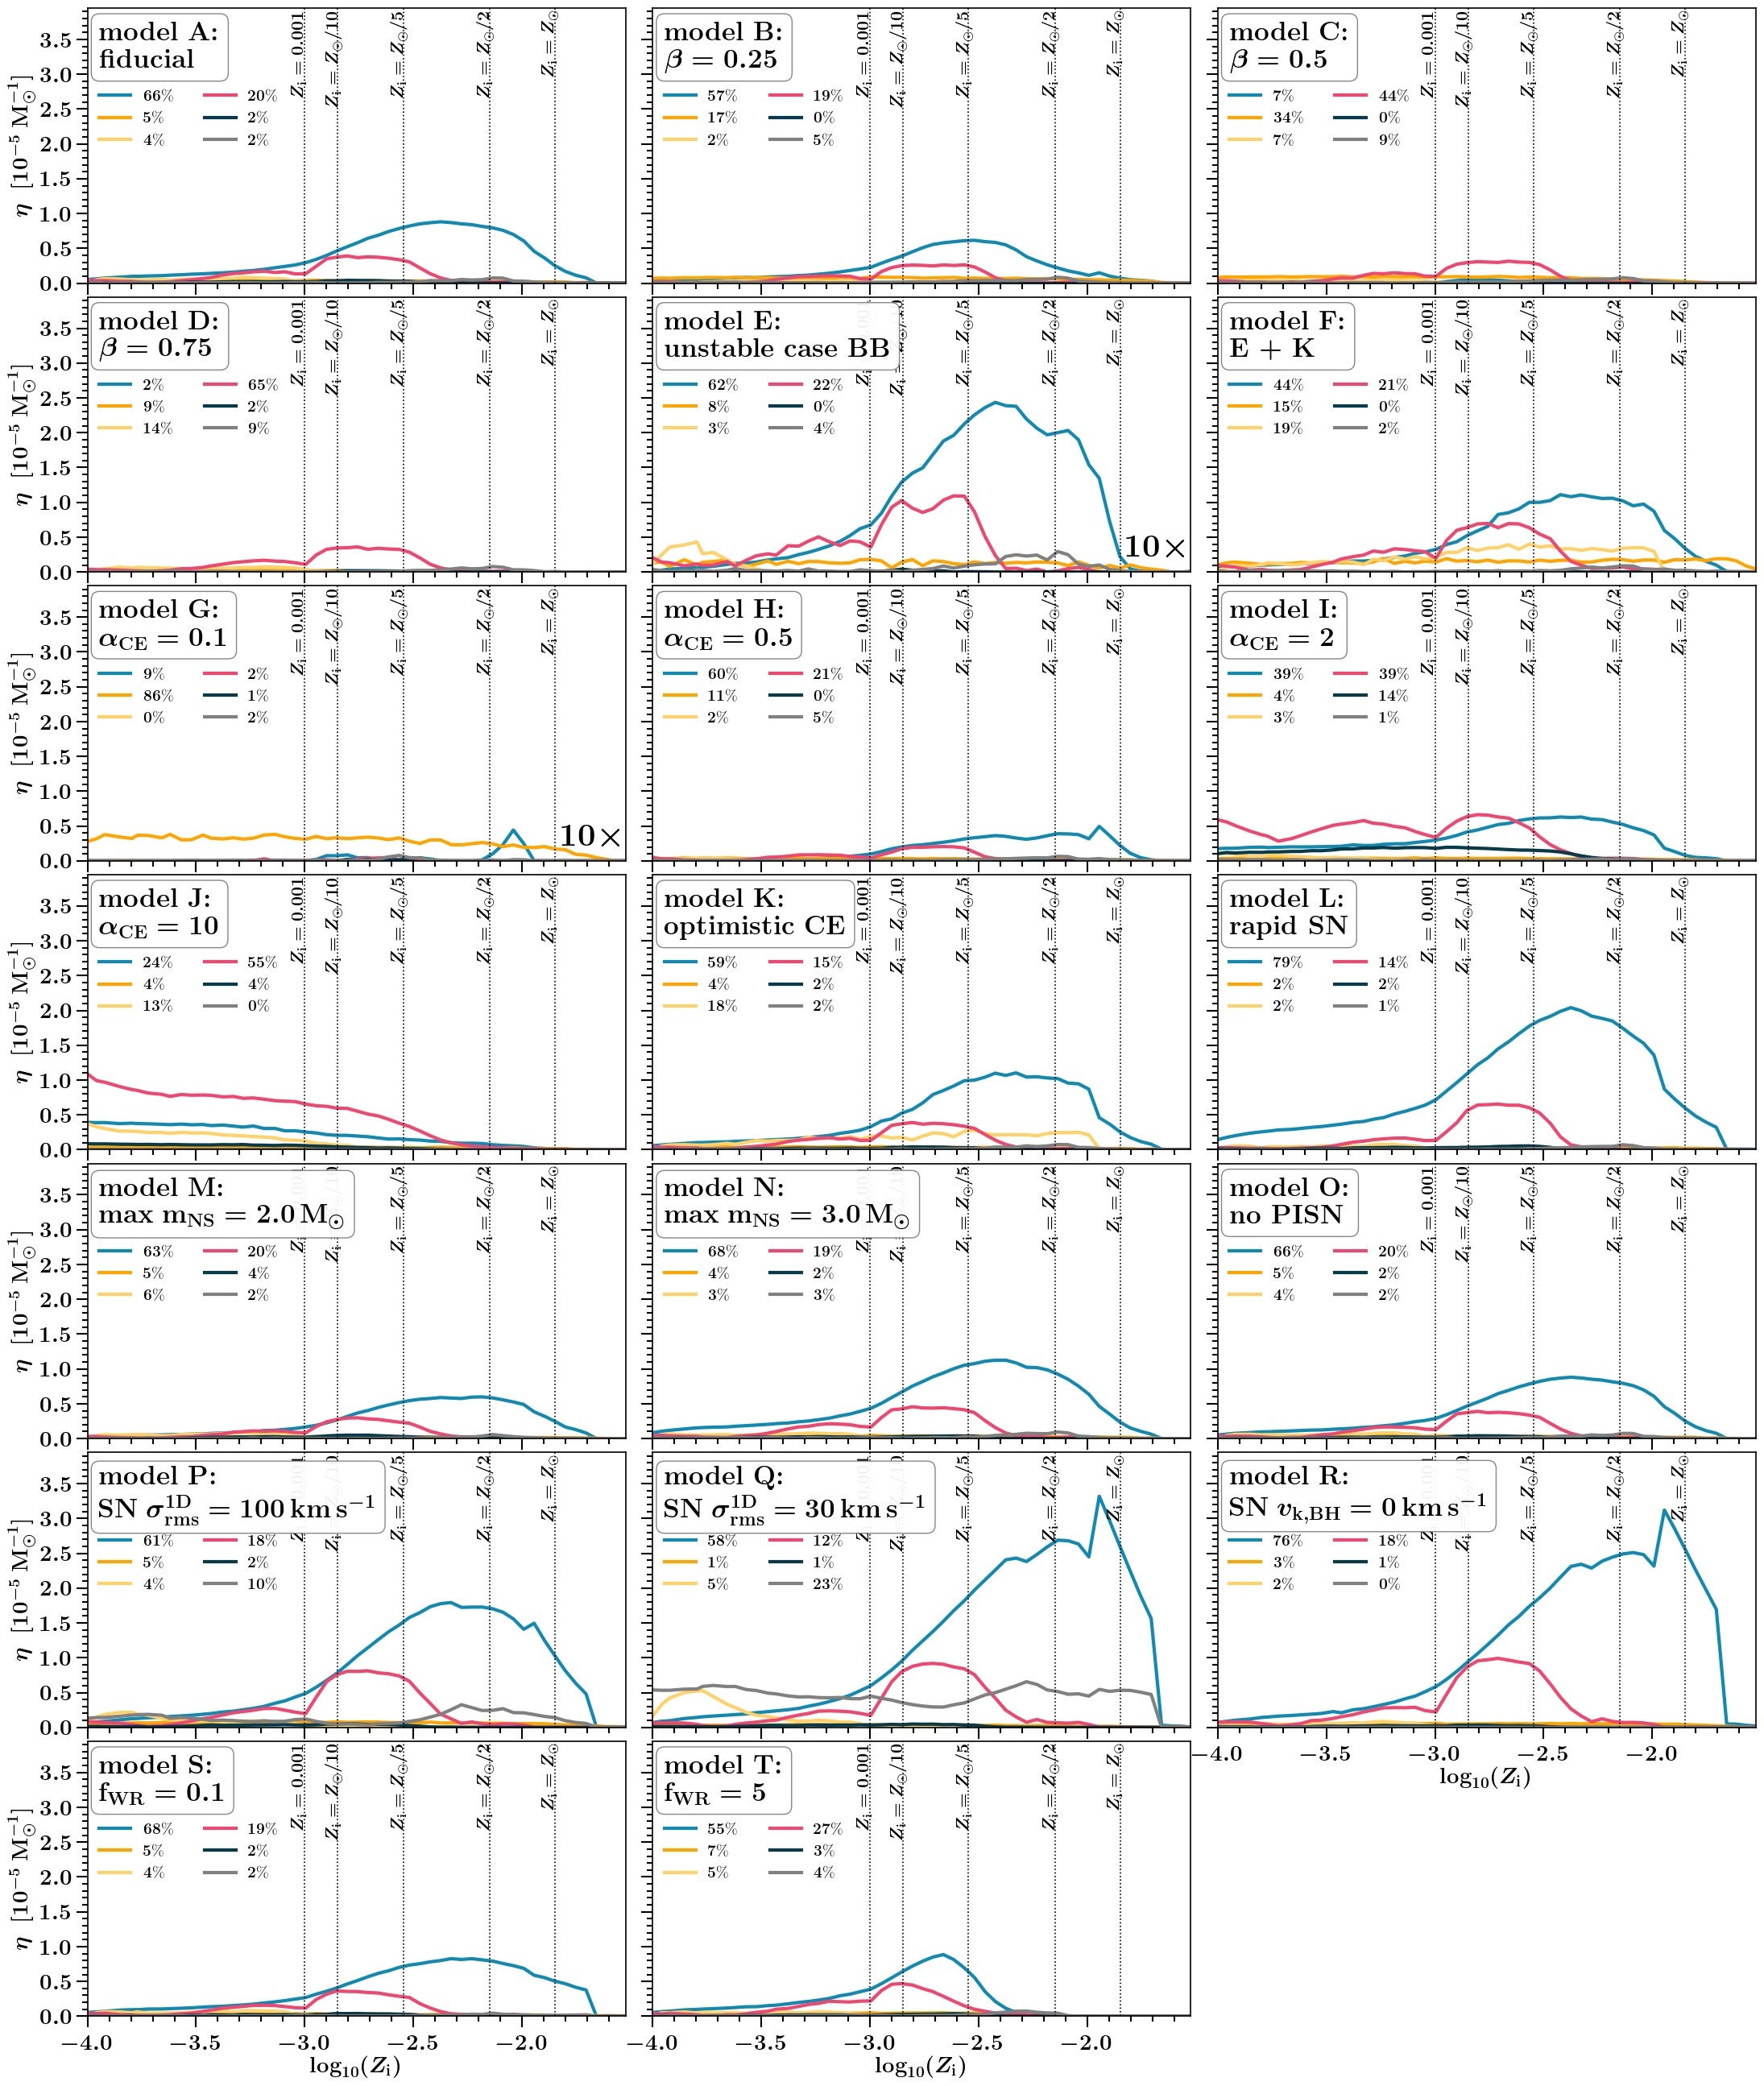

In [9]:
csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/' 
plotGridFormationRatePerMetallicity(DCOtype = 'BHNS',Ylim = 3.95, csvPath=csvPath, plot_stacked=False)



doing DCO type   BNS


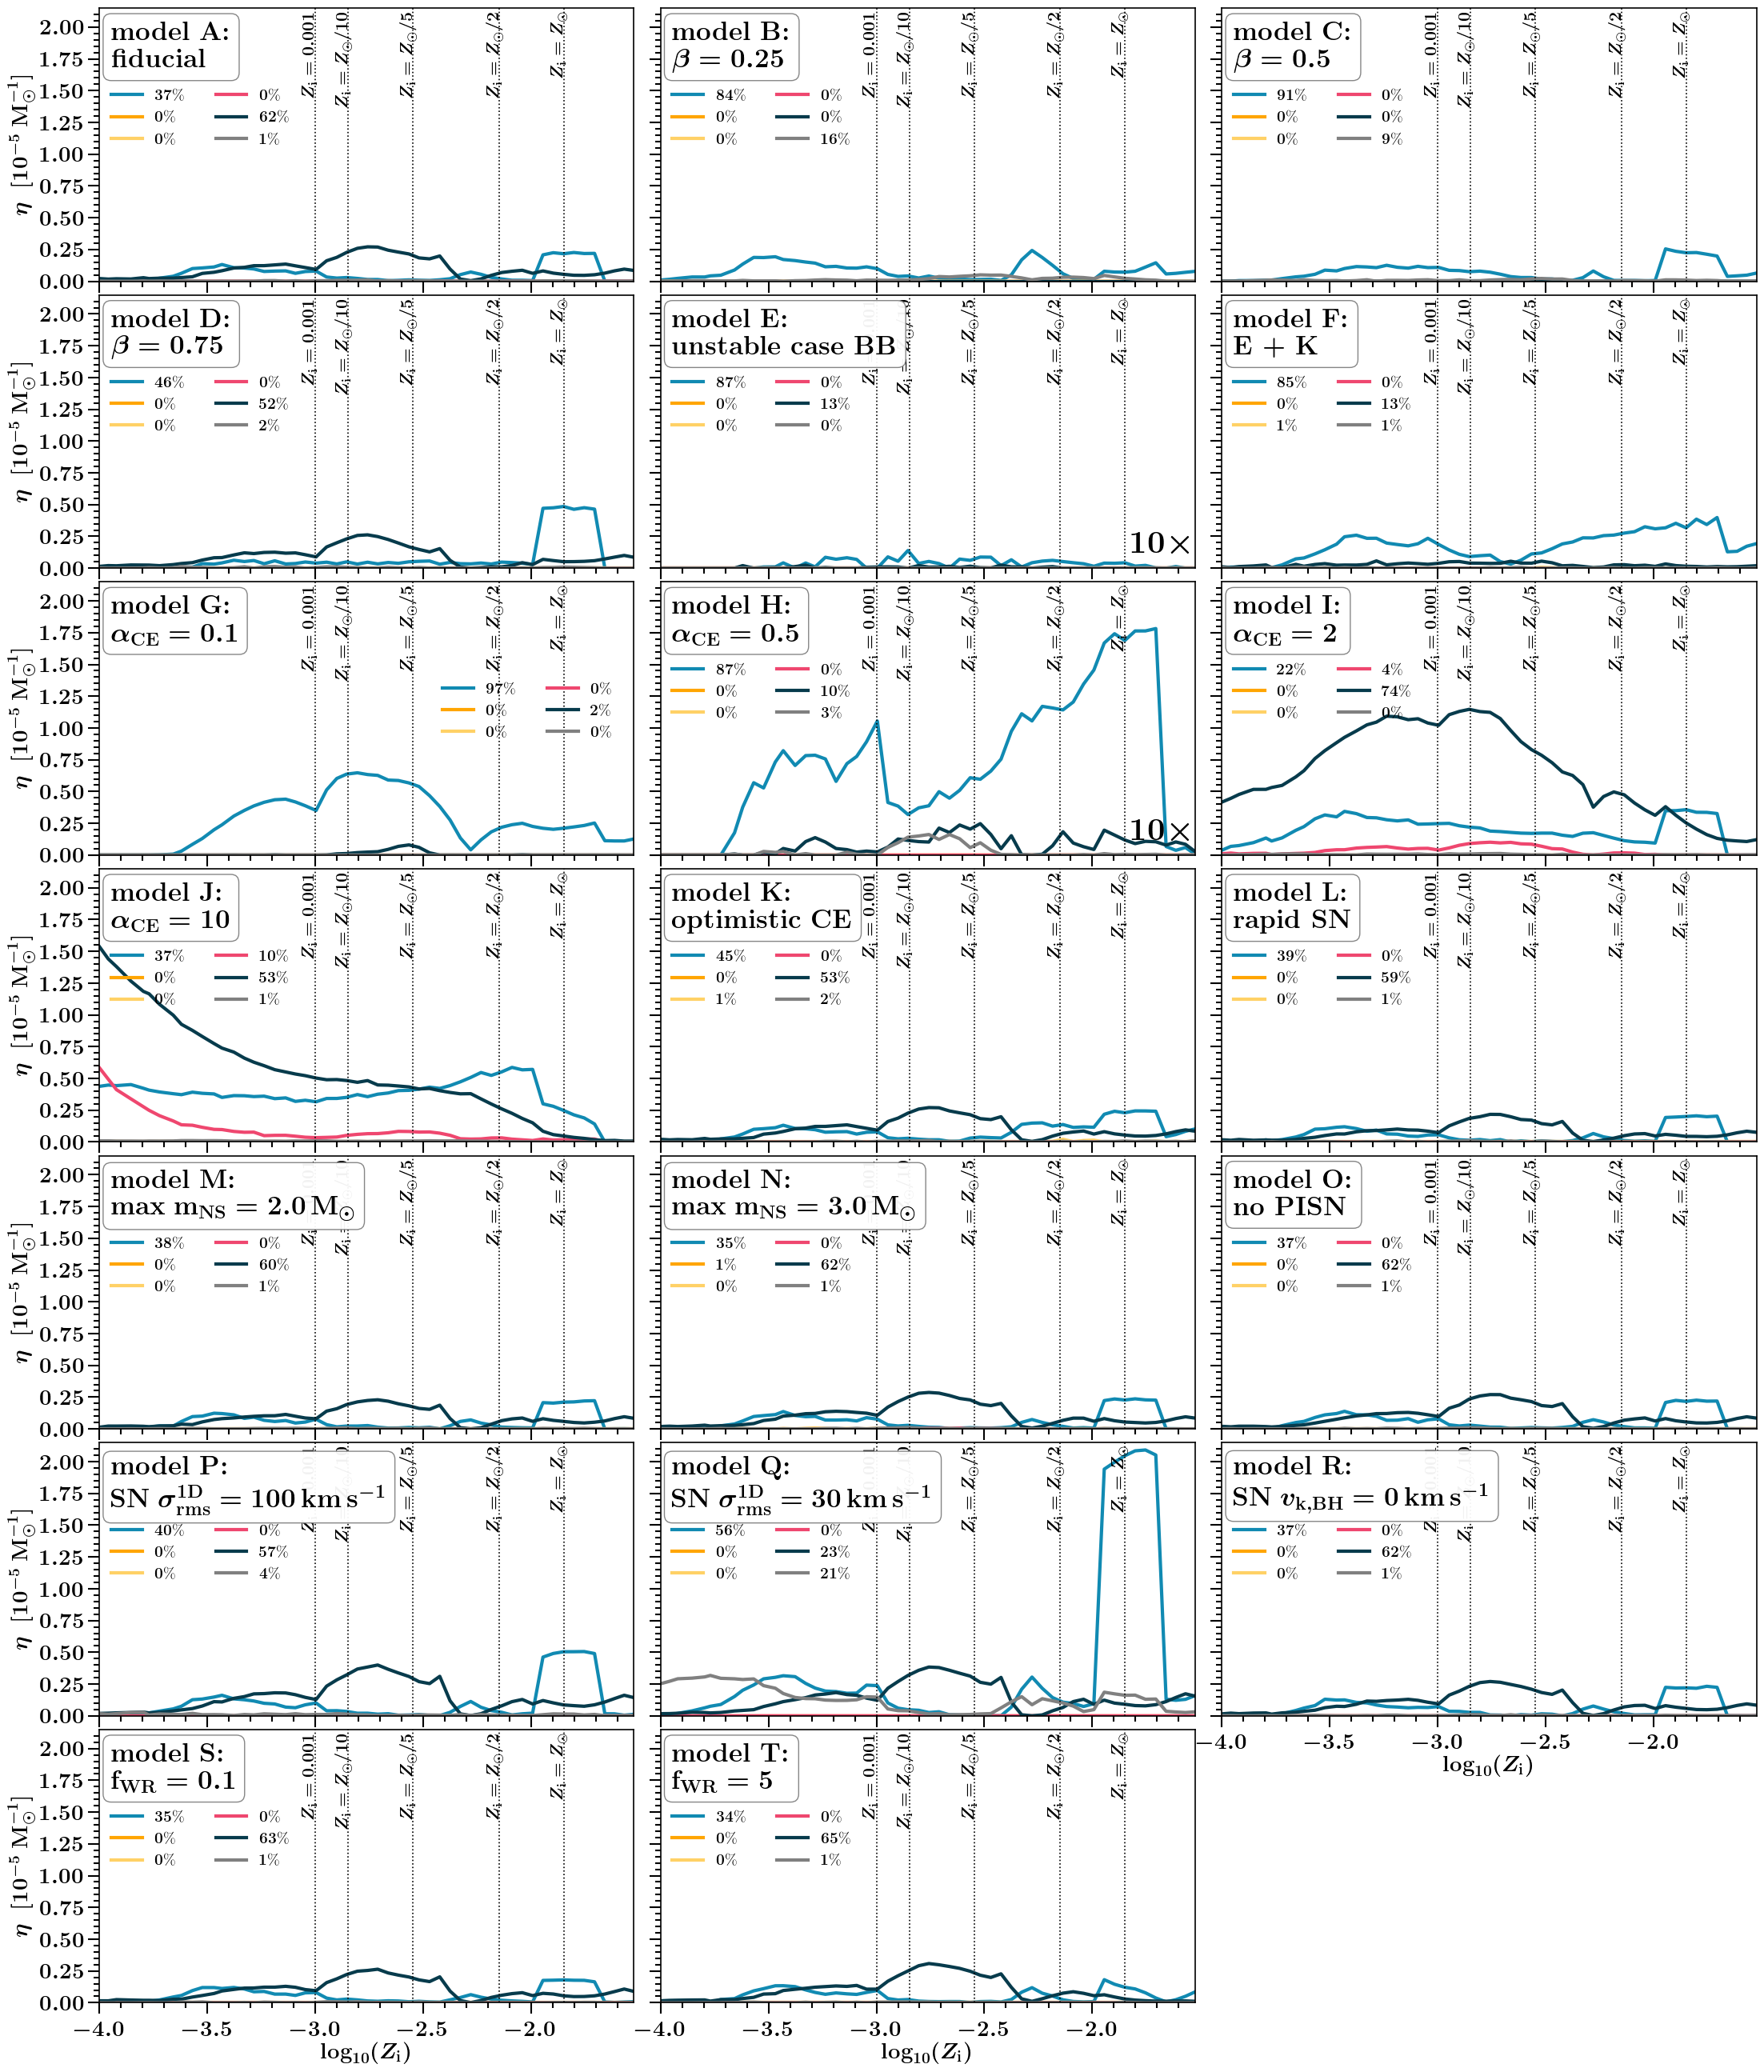

In [10]:
csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/' 
plotGridFormationRatePerMetallicity(DCOtype = 'BNS',Ylim = 2.15, csvPath=csvPath, plot_stacked=False)



In [11]:

def plotGridFormationRatePerMetallicityInOnePlot(DCOtype = 'BBH', Ylim = 10, csvPath='None', plot_stacked=True, pathToData='/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/', plot_fraction=False):

    channel_names = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #['I_classic', 'II_only_stable_MT', 'III_single_core_CE', 'IV_double_core_CE', 'V_other']
    colorlist = [channelColorDict[i] for i in channel_names]
    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}
    print('doing DCO type  ', DCOtype)
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]  
    DCOname = dictDCOtypeDCOlabel[DCOtype]
    log10metallicities= np.log10(np.asarray(metallicities_list))


    ncols, nrows = 1, 1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(12,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)}) 

    stringgg =  'formation_channels_per_Z_hdf5weights'
    writePath = pathToData  + stringgg + '_'  + DCOname + '.csv'
    
    for ind_m, bps_model in enumerate(BPSnameslist[:]):

        # hack to obtain the axis row and column index 
        ii, jj  = int(ind_m/ncols)%nrows, ind_m%ncols
         
        formationRates = []
        # obtain dataframe with formation channels yields
        df = pd.read_csv(writePath, index_col=0)
        
        for nrC, c_ in enumerate(channel_names):             # get rate of this channel: 
            key_ = bps_model + ' ' + headerDict_Z_rev[c_]+ '  [Msun^{-1}]' #bps_model + ' ' + c_ + '  [Msun^{-1}]'
            formationRates.append(df[key_])


        # plot for this sub panel & sub model the formation rate per metallicity 
        axe = plotFormationChannelsPerMetallicitySingle(axe=axe, metallicities=log10metallicities, formationRates=formationRates, \
                                                               colorlist=colorlist, BPSmodelname=bps_model, Ylim=Ylim, DCOtype=DCOtype, plot_stacked=plot_stacked, plot_fraction=plot_fraction)

    
    ######### SET LABELS AND AXIS TICKS #########
    fs_label = 20  # fontsize for x and y labels 
    ylabel = r'$\eta \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'   
    xlabel = r'$\log_{10}(Z_{\rm{i}})$'
    if plot_fraction == True: ylabel = r'$\textbf{fraction}  $'   # overwrite ylabel
    #### set labels for all needed panels in column 1 ####
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs_label)
    ################################################
    
    
    plt.tight_layout() 
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    if plot_stacked==True:
        stack_str = 'stacked'
    else:
        stack_str = 'notstacked'
    if plot_fraction==True: fract_str = '_yield'
    else: fract_str = '_fraction'
        
    plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + 'OneFig.png', dpi=600, transparent=True)
    plt.savefig('./FormationRatePerZ_'+ DCOname +'_' + stack_str + fract_str + 'OneFig.pdf')
    plt.show()
    plt.close()
    

doing DCO type   BBH


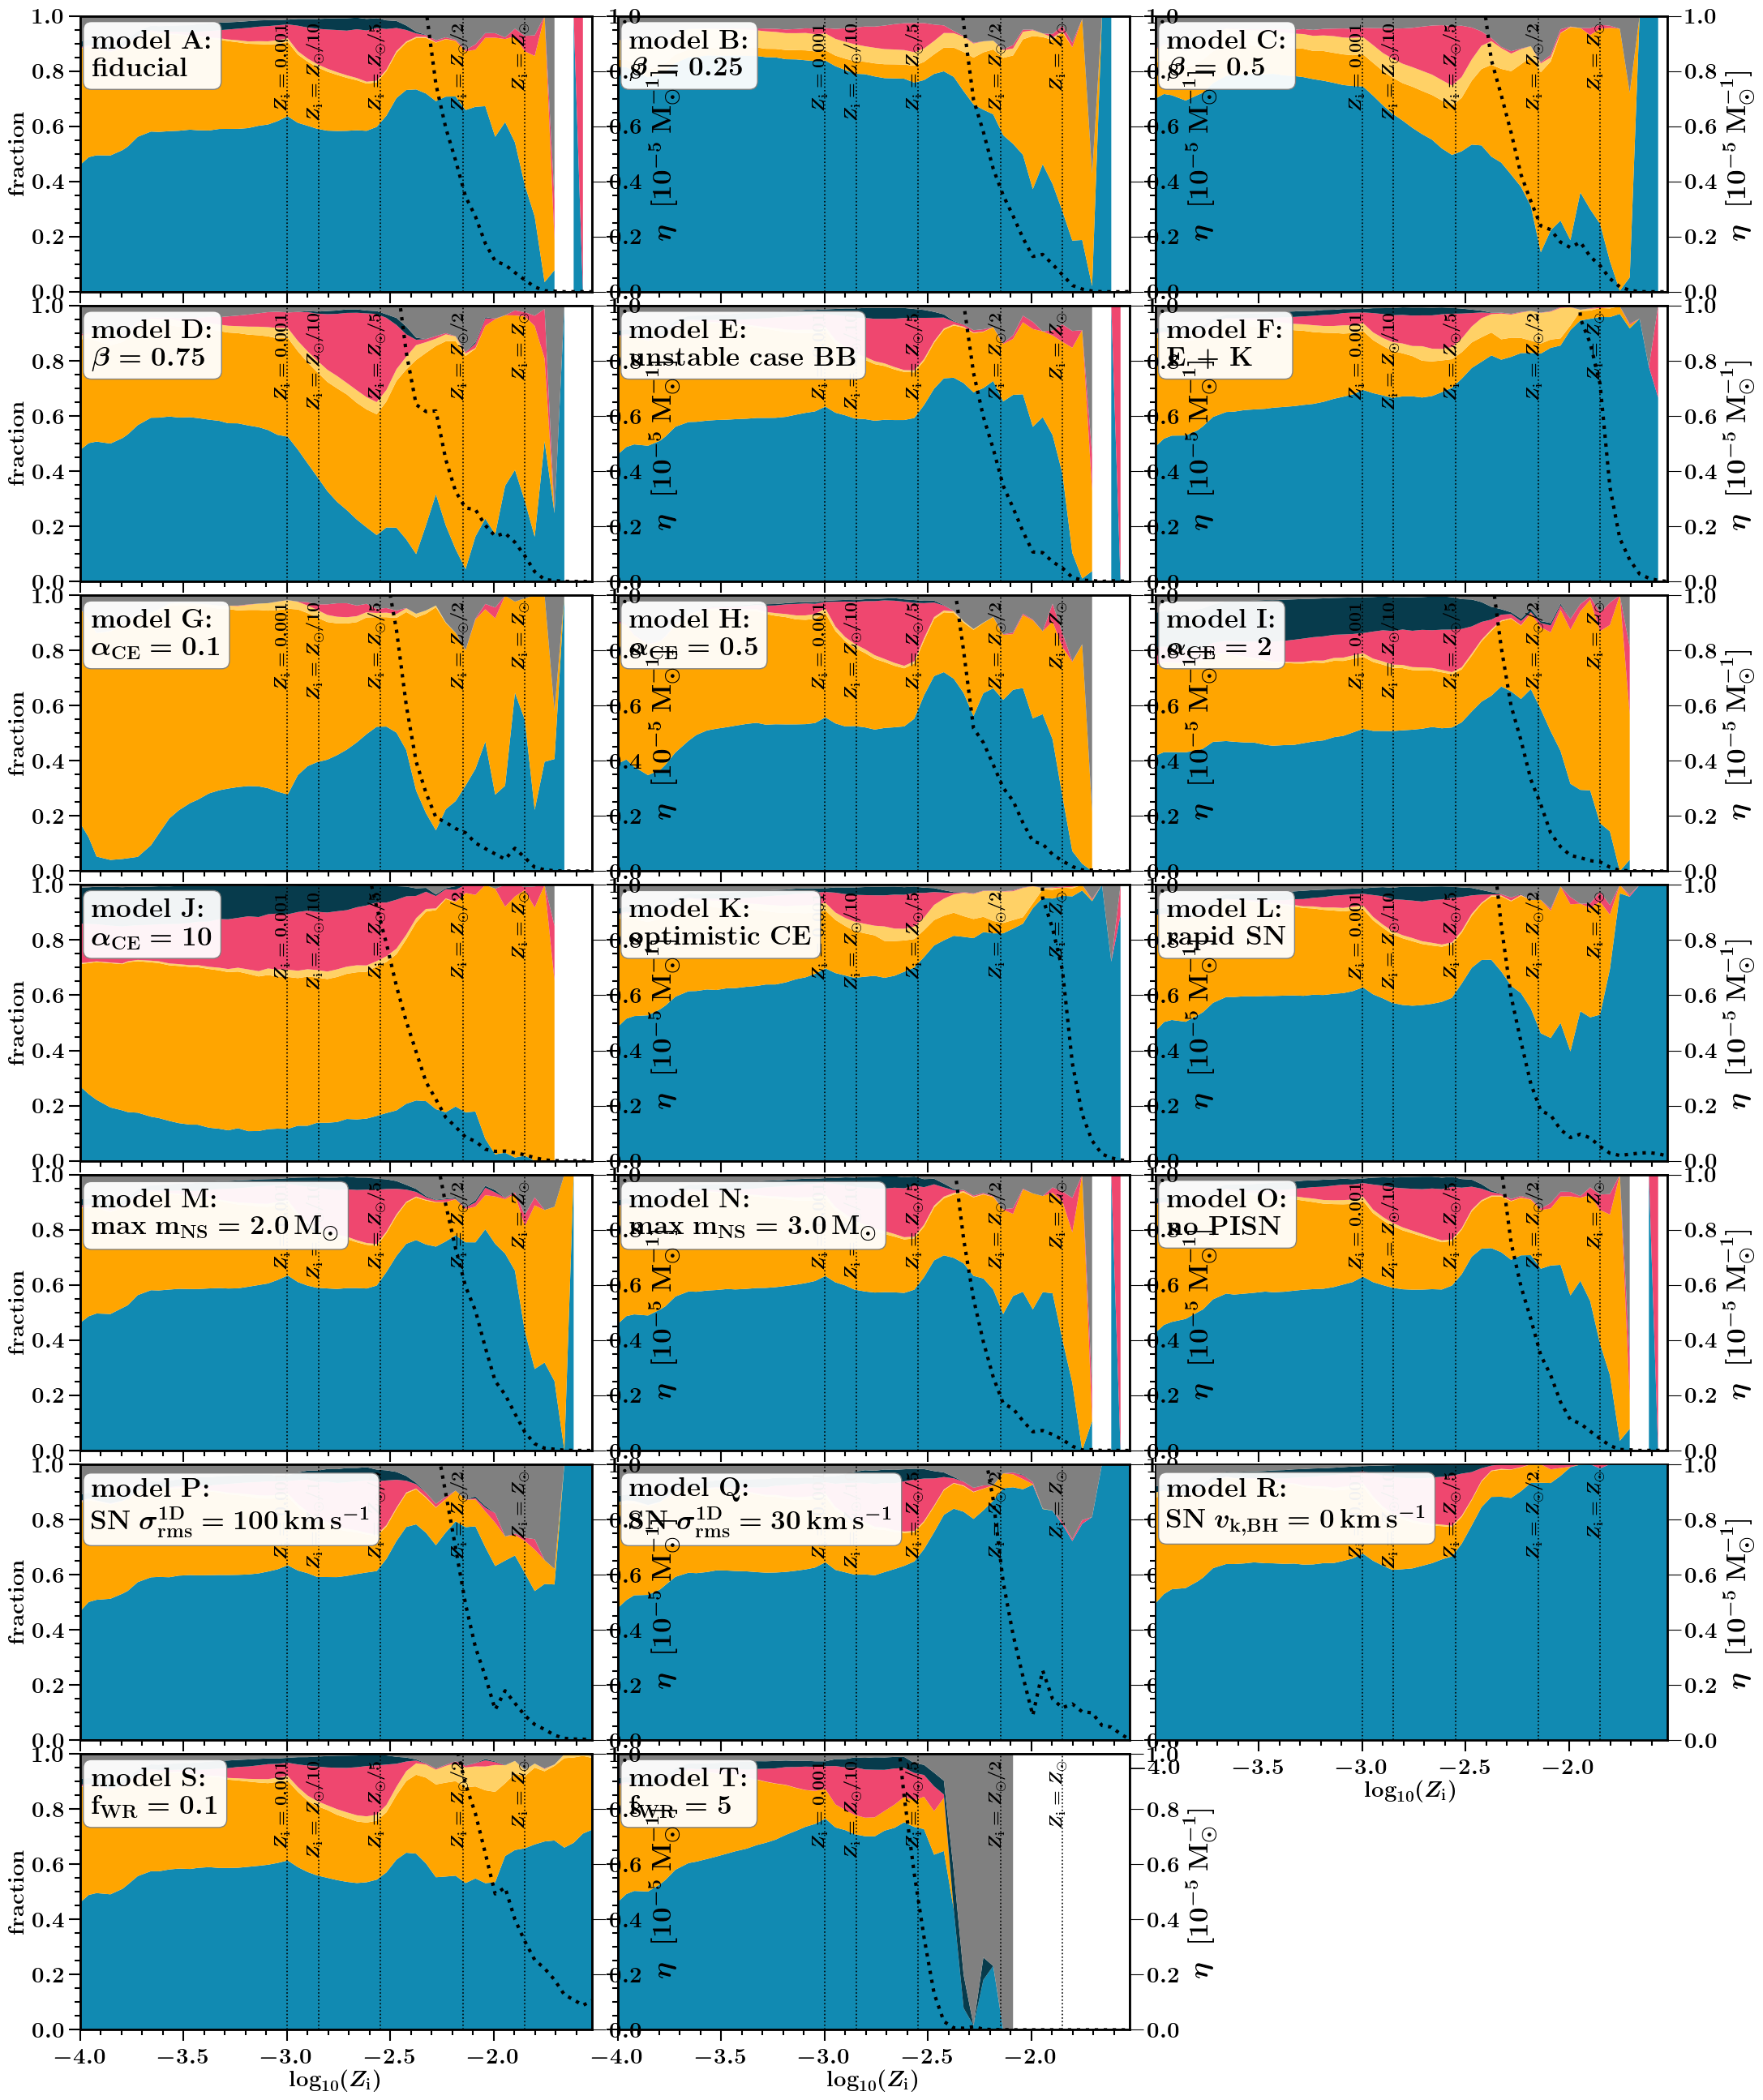

In [12]:


csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/'    
plotGridFormationRatePerMetallicity(DCOtype = 'BBH', Ylim = 1, csvPath=csvPath, plot_stacked=True, plot_fraction=True)



doing DCO type   BBH


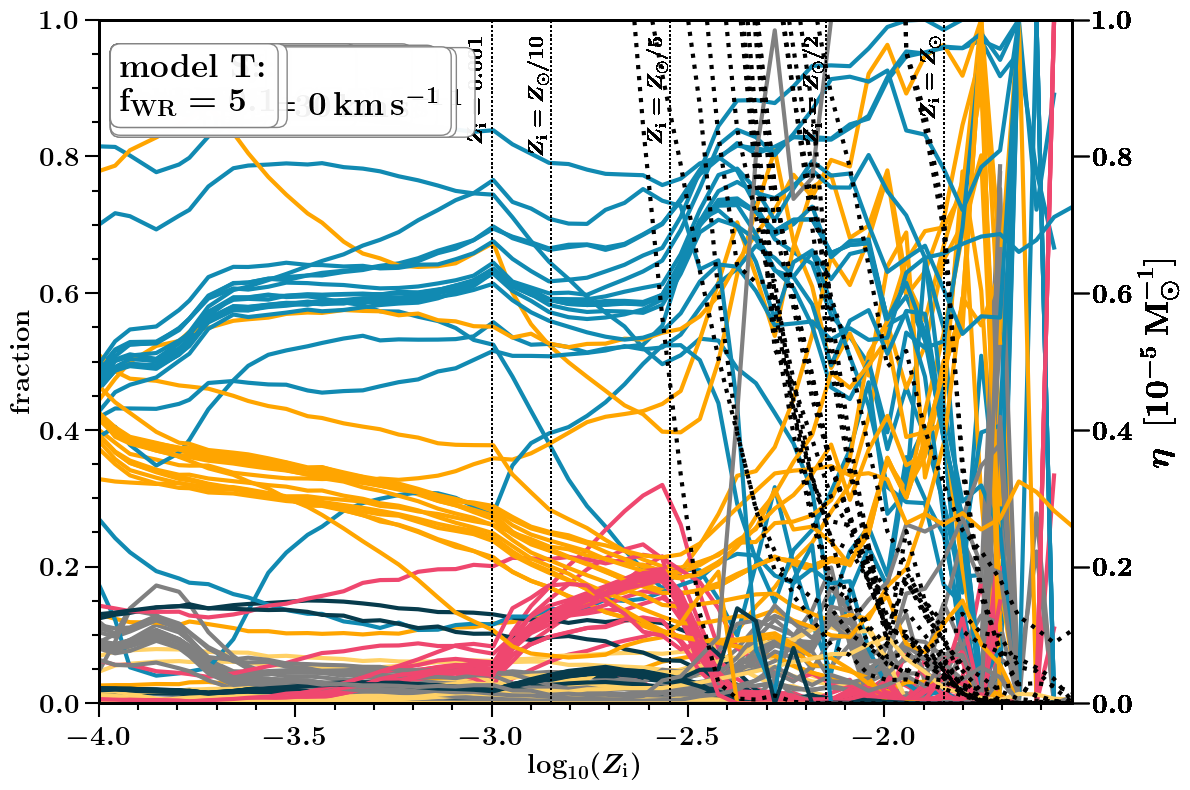

In [13]:
csvPath ='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/'    
plotGridFormationRatePerMetallicityInOnePlot(DCOtype = 'BBH', Ylim = 1, csvPath=csvPath, plot_stacked=False, plot_fraction=True)